<a href="https://colab.research.google.com/github/TracyMabaso/Ncobile/blob/main/LAB04_230136850.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
pip install pandas numpy scikit-learn matplotlib

In [101]:
import pandas as pd
from io import StringIO

csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''
df = pd.read_csv(StringIO(csv_data))
print(df)
print(df.isnull().sum())

      A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN
A    0
B    0
C    1
D    1
dtype: int64


In [102]:
# Drop rows with any missing values
print(df.dropna(axis=0))

# Drop columns with any missing values
print(df.dropna(axis=1))

# Drop rows where all values are missing (none in this case)
print(df.dropna(how='all'))

# Drop rows with fewer than 4 non-missing values
print(df.dropna(thresh=4))

# Drop rows where 'C' is missing
print(df.dropna(subset=['C']))

     A    B    C    D
0  1.0  2.0  3.0  4.0
      A     B
0   1.0   2.0
1   5.0   6.0
2  10.0  11.0
      A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN
     A    B    C    D
0  1.0  2.0  3.0  4.0
      A     B     C    D
0   1.0   2.0   3.0  4.0
2  10.0  11.0  12.0  NaN


In [103]:
from sklearn.impute import SimpleImputer
import numpy as np

imr = SimpleImputer(missing_values=np.nan, strategy='median')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
print(imputed_data)

[[ 1.   2.   3.   4. ]
 [ 5.   6.   7.5  8. ]
 [10.  11.  12.   6. ]]


In [104]:
df = pd.DataFrame([
    ['green', 'M', 10.1, 'class2'],
    ['red', 'L', 13.5, 'class1'],
    ['blue', 'XL', 15.3, 'class2'],
    ['yellow', 'S', 9.5, 'class1']
])
df.columns = ['color', 'size', 'price', 'classlabel']

size_mapping = {'XL': 3, 'L': 2, 'M': 1,'S': 0}
df['size'] = df['size'].map(size_mapping)
print(df)

# Inverse mapping
inv_size_mapping = {v: k for k, v in size_mapping.items()}
print(df['size'].map(inv_size_mapping))

    color  size  price classlabel
0   green     1   10.1     class2
1     red     2   13.5     class1
2    blue     3   15.3     class2
3  yellow     0    9.5     class1
0     M
1     L
2    XL
3     S
Name: size, dtype: object


In [105]:
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
print(y)

# Inverse
print(class_le.inverse_transform(y))
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping
# to convert class labels from strings to integers
df['classlabel'] = df['classlabel'].map(class_mapping)
df

[1 0 1 0]
['class2' 'class1' 'class2' 'class1']


,color,size,price,classlabel
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1
3,yellow,0,9.5,0


In [106]:
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
print(X)

# One-hot encoding
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
print(ohe.fit_transform(X[:, [0]]).toarray())  # Only on 'color'

# Using pandas get_dummies
print(pd.get_dummies(df[['price', 'color', 'size']]))

# Drop first column to avoid multicollinearity
print(pd.get_dummies(df[['price', 'color', 'size']], drop_first=True))
X = df[['color', 'size', 'price']].values

color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0]) #1st index
X

[[1 1 10.1]
 [2 2 13.5]
 [0 3 15.3]
 [3 0 9.5]]
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]
   price  size  color_blue  color_green  color_red  color_yellow
0   10.1     1       False         True      False         False
1   13.5     2       False        False       True         False
2   15.3     3        True        False      False         False
3    9.5     0       False        False      False          True
   price  size  color_green  color_red  color_yellow
0   10.1     1         True      False         False
1   13.5     2        False       True         False
2   15.3     3        False      False         False
3    9.5     0        False      False          True


array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3],
       [3, 0, 9.5]], dtype=object)

In [107]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
print(df_wine.head())

from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)

   Class label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0            1    14.23        1.71  2.43               15.6        127   
1            1    13.20        1.78  2.14               11.2        100   
2            1    13.16        2.36  2.67               18.6        101   
3            1    14.37        1.95  2.50               16.8        113   
4            1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92  

In [108]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)
print(X_train_norm[:2])  # First two rows

[[0.12573099 0.02964427 0.65240642 0.3814433  0.2962963  0.42068966
  0.39451477 0.16981132 0.61075949 0.11634103 0.32978723 0.66300366
  0.17261056]
 [0.79239766 0.14624506 0.51336898 0.31958763 0.30864198 0.42068966
  0.44092827 0.24528302 0.36392405 0.28952043 0.73404255 0.56776557
  0.7146933 ]]


In [109]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
print(X_train_std[:2])

[[-1.45083563 -1.27985582  0.74306024 -0.49136511 -0.37078043 -0.15558334
   0.17965734 -1.20822065  1.29150989 -0.84486398 -0.74910758  0.66674895
  -0.71247369]
 [ 1.34746381 -0.75756493 -0.2118226  -0.84257574 -0.29683265 -0.15558334
   0.39838279 -0.87620839 -0.0490171  -0.00656951  0.99652401  0.29506888
   1.63245344]]


In [110]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=0.1, solver='liblinear', multi_class='ovr')
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))
print(lr.coef_)

Training accuracy: 0.9859154929577465
Test accuracy: 0.9722222222222222
[[ 0.26964786  0.          0.         -0.01985438  0.          0.
   0.63125293  0.          0.          0.          0.          0.
   1.56904874]
 [-0.87604793 -0.03172309 -0.04884568  0.          0.          0.
   0.          0.          0.         -0.83522386  0.10879965  0.00553609
  -0.44772671]
 [ 0.          0.02131475  0.          0.          0.          0.
  -0.85279762  0.          0.          0.59115093 -0.40324496 -0.38692717
   0.        ]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


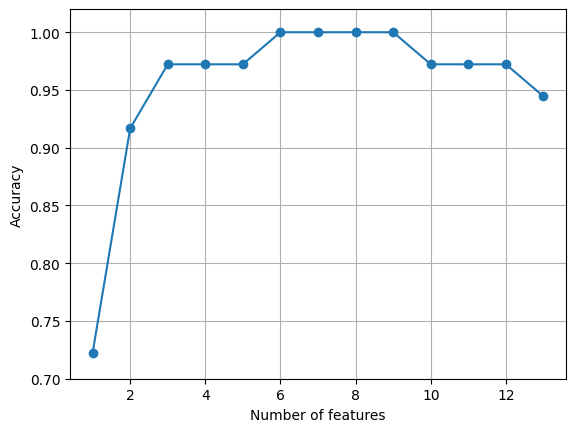

Index(['Alcohol', 'Flavanoids', 'Proanthocyanins'], dtype='object')
Test accuracy: 0.9166666666666666


In [111]:
from sklearn.base import clone
from itertools import combinations
import numpy as np

class SBS:
    def __init__(self, estimator, k_features, scoring=None,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=self.test_size, random_state=self.random_state
        )
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train,
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train,
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        return self.estimator.score(X_test[:, indices], y_test)

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

# Selected features
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

# Performance with selected
knn.fit(X_train_std[:, k3], y_train)
print('Test accuracy:', knn.score(X_test_std[:, k3], y_test))

 1) Proline                        0.188217
 2) Flavanoids                     0.151884
 3) Color intensity                0.150182
 4) Alcohol                        0.137097
 5) OD280/OD315 of diluted wines   0.126218
 6) Hue                            0.062428
 7) Total phenols                  0.051911
 8) Malic acid                     0.031839
 9) Magnesium                      0.028725
10) Alcalinity of ash              0.025410
11) Proanthocyanins                0.018676
12) Ash                            0.014667
13) Nonflavanoid phenols           0.012745


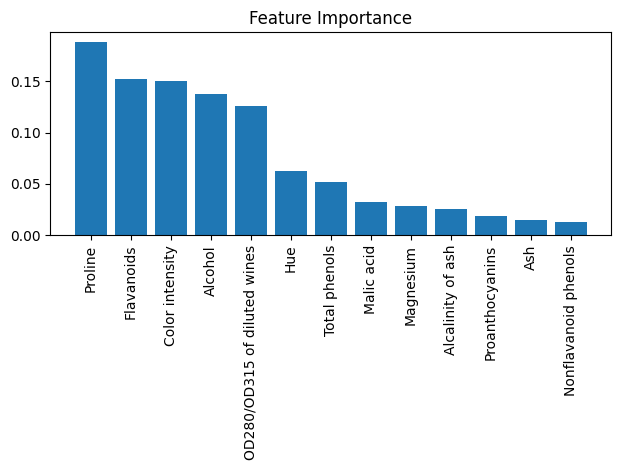

In [112]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[indices[f]],
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]),
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('images/04_09.png', dpi=300)
plt.show()

In [113]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('Number of features that meet this threshold criterion:',
      X_selected.shape[1])

Number of features that meet this threshold criterion: 5
